In [17]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import excel file
df = pd.read_excel(r"C:\Users\Galvin\Desktop\InsideSherpa Virtual Internships\ANZ\ANZ synthesised transaction dataset.xlsx")

In [3]:
#extract salary dataframe
df_salary = df.loc[df['txn_description'] == 'PAY/SALARY']

In [4]:
#check completeness of dataframe
df_salary.isnull().sum()

status                 0
card_present_flag    883
bpay_biller_code       0
account                0
currency               0
long_lat               0
txn_description        0
merchant_id          883
merchant_code          0
first_name             0
balance                0
date                   0
month                  0
gender                 0
age                    0
merchant_suburb      883
merchant_state       883
extraction             0
time                   0
amount                 0
transaction_id         0
country                0
customer_id            0
merchant_long_lat    883
movement               0
dtype: int64

Text(0, 0.5, 'Salary')

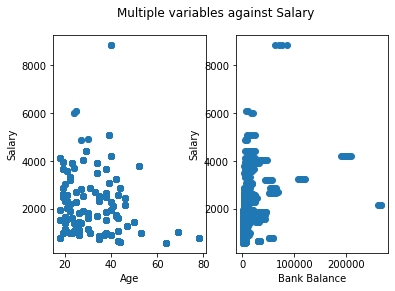

In [5]:
#visualise correlation of variables with scatterplot
y = df_salary['amount']

fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Multiple variables against Salary')

ax1.scatter(df_salary['age'],y)
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')

ax2.scatter(df_salary['balance'],y)
ax2.set_xlabel('Bank Balance')
ax2.set_ylabel('Salary')

In [6]:
#map categorical variable into binary
df_salary['gender'] = df_salary['gender'].map({'F':0,'M':1})

C:\Users\Galvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
#check correlation of variables with salary
df_salary.corr(method='pearson')['amount']

card_present_flag         NaN
merchant_code             NaN
balance              0.287501
gender               0.181306
age                 -0.138594
amount               1.000000
Name: amount, dtype: float64

In [13]:
#split data into train and test set
x = df_salary[['balance', 'gender', 'age']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
#check dimensions are consistent
x_train.shape, y_train.shape

((618, 3), (618,))

In [15]:
#train and evaluate model
reg = LinearRegression()
model = reg.fit(x_train, y_train)
score = model.score(x_test, y_test)
score

0.08970883040793975